<h1>Data Cleaning</h1>

In [1]:
import pandas as pd
df=pd.read_csv('messy_sales.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'messy_sales.csv'

In [ ]:
df

,ID,Name,Age,City,Sales,Date
0,1,John Smith,29,new york,250.0,2024-01-05
1,2,jane smith,NaN,New York,300.0,2024-02-10
2,3,"Mike,Lee",41,los angeles,400.0,2024/03/15
3,4,Sara Khan,-,Chicago,500.0,15-04-2024
4,5,John Smith,29,New York,250.0,2024-01-05
5,6,L. Patel,35,San fransc.,NaN,2024-06-12
6,7,Anita Sharma,27,chennai,700.0,2024.07.18
7,8,Robert Jr.,42,Delhi,800.0,07-08-2024
8,9,michael,30,los angles,900.0,2024-09-25
9,10,NaN,33,Banglore,1000.0,25/10/2024


In [ ]:
df.head()

,ID,Name,Age,City,Sales,Date
0,1,John Smith,29,new york,250.0,2024-01-05
1,2,jane smith,NaN,New York,300.0,2024-02-10
2,3,"Mike,Lee",41,los angeles,400.0,2024/03/15
3,4,Sara Khan,-,Chicago,500.0,15-04-2024
4,5,John Smith,29,New York,250.0,2024-01-05


In [ ]:
df.head(7)


,ID,Name,Age,City,Sales,Date
0,1,John Smith,29,new york,250.0,2024-01-05
1,2,jane smith,NaN,New York,300.0,2024-02-10
2,3,"Mike,Lee",41,los angeles,400.0,2024/03/15
3,4,Sara Khan,-,Chicago,500.0,15-04-2024
4,5,John Smith,29,New York,250.0,2024-01-05
5,6,L. Patel,35,San fransc.,NaN,2024-06-12
6,7,Anita Sharma,27,chennai,700.0,2024.07.18


In [ ]:
df.isna()

,ID,Name,Age,City,Sales,Date
0,False,False,False,False,False,False
1,False,False,True,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,True,False,False,False,False


In [ ]:
df.isna().sum()

ID       0
Name     1
Age      3
City     0
Sales    2
Date     0
dtype: int64

<h4>To see how many Age columns are Null</h4>

In [ ]:
#df[df['column_name'].isna()]
df[df['Age'].isna()]

,ID,Name,Age,City,Sales,Date
1,2,jane smith,NaN,New York,300.0,2024-02-10
11,12,Emily,NaN,mumbai,1100.0,2024-11-30
13,14,Sophia@,NaN,Delhi,NaN,2024-13-01


<h4>To see how many Name columns are Null</h4>

In [ ]:
df[df['Name'].isna()]

,ID,Name,Age,City,Sales,Date
9,10,NaN,33,Banglore,1000.0,25/10/2024


<h4>If no value is null</h4>

In [ ]:
df[df['Date'].isna()]

,ID,Name,Age,City,Sales,Date


In [ ]:
df.describe()

,ID,Sales
count,15.000000,13.000000
mean,8.000000,696.153846
std,4.472136,401.798840
min,1.000000,250.000000
25%,4.500000,300.000000
50%,8.000000,700.000000
75%,11.500000,1000.000000
max,15.000000,1400.000000


In [ ]:
df.dtypes

ID         int64
Name      object
Age       object
City      object
Sales    float64
Date      object
dtype: object

In [ ]:
df.columns


Index(['ID', 'Name', 'Age', 'City', 'Sales', 'Date'], dtype='object')

<h3>Histogram</h3>

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

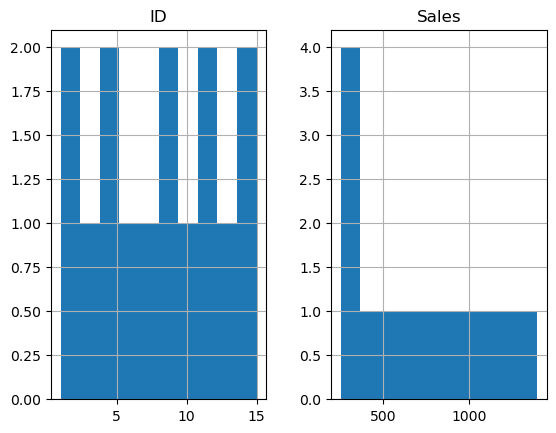

In [ ]:
df.hist()

<h3>Scatter Plot</h3>

<Axes: xlabel='Sales', ylabel='Date'>

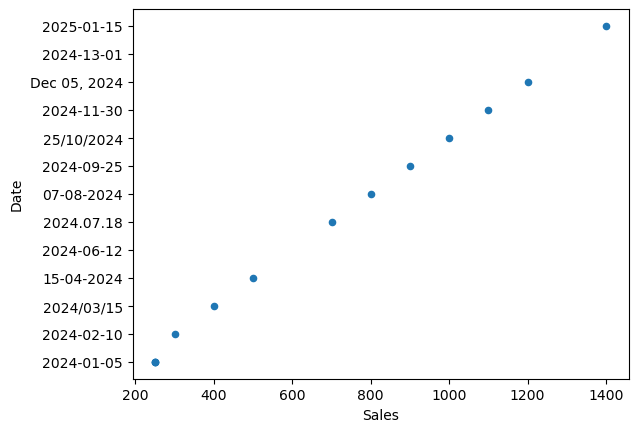

In [ ]:
df.plot.scatter(x='Sales',y='Date')

<h3>If using Matplotlib</h3>

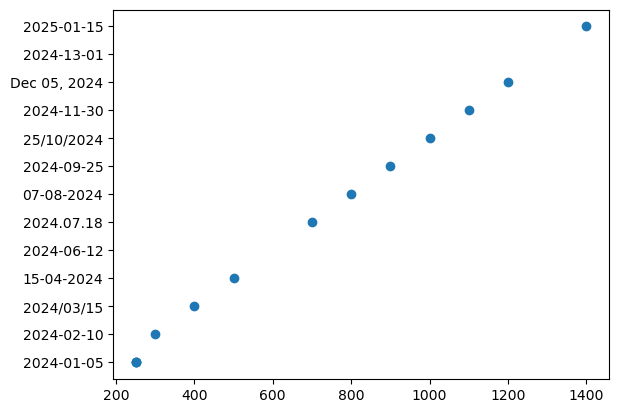

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df["Sales"], df["Date"])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      15 non-null     int64  
 1   Name    14 non-null     object 
 2   Age     12 non-null     object 
 3   City    15 non-null     object 
 4   Sales   13 non-null     float64
 5   Date    15 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 852.0+ bytes


In [ ]:
df.isna().sum()

ID       0
Name     1
Age      3
City     0
Sales    2
Date     0
dtype: int64

<h2>Trim extra spaces in text columns</h2>
<h3>Messy data often has leading/trailing spaces (e.g., " Emily " instead of "Emily").
For example, if you want to remove spaces in the Name column:</h3>

In [ ]:
#str.strip() is a string function in pandas (and Python) that removes any unwanted spaces at the beginning and end of text.
df["Name"] = df["Name"].str.strip()
df.head()

,ID,Name,Age,City,Sales,Date
0,1,John Smith,29,new york,250.0,2024-01-05
1,2,jane smith,NaN,New York,300.0,2024-02-10
2,3,"Mike,Lee",41,los angeles,400.0,2024/03/15
3,4,Sara Khan,-,Chicago,500.0,15-04-2024
4,5,John Smith,29,New York,250.0,2024-01-05


<h3>If you also want to clean City column:</h3>

In [ ]:
df['City']=df['City'].str.strip()
df.head()

,ID,Name,Age,City,Sales,Date
0,1,John Smith,29,new york,250.0,2024-01-05
1,2,jane smith,NaN,New York,300.0,2024-02-10
2,3,"Mike,Lee",41,los angeles,400.0,2024/03/15
3,4,Sara Khan,-,Chicago,500.0,15-04-2024
4,5,John Smith,29,New York,250.0,2024-01-05


In [ ]:
# 1. Remove extra spaces
df["Name"] = df["Name"].str.strip()

# 2. Replace commas with spaces
df['Name']=df['Name'].str.replace(',',' ') #Mike,Lee

# 3. Capitalize names
df["Name"] = df["Name"].str.title() #jane smith


df.head()


,ID,Name,Age,City,Sales,Date
0,1,John Smith,29,new york,250.0,2024-01-05
1,2,Jane Smith,NaN,New York,300.0,2024-02-10
2,3,Mike Lee,41,los angeles,400.0,2024/03/15
3,4,Sara Khan,-,Chicago,500.0,15-04-2024
4,5,John Smith,29,New York,250.0,2024-01-05


In [ ]:
print(df["Name"].unique())


['John Smith' 'Jane Smith' 'Mike Lee' 'Sara Khan' 'L. Patel'
 'Anita   Sharma' 'Robert Jr.' 'Michael' nan 'Emily' 'David' 'Sophia@'
 'Chris P.']


In [ ]:
# Remove special characters except letters, spaces, dots, and hyphens
df["Name"] = df["Name"].str.replace(r"[^A-Za-z\s\.-]", "", regex=True) #Sophia@
df

,ID,Name,Age,City,Sales,Date
0,1,John Smith,29,new york,250.0,2024-01-05
1,2,Jane Smith,NaN,New York,300.0,2024-02-10
2,3,Mike Lee,41,los angeles,400.0,2024/03/15
3,4,Sara Khan,-,Chicago,500.0,15-04-2024
4,5,John Smith,29,New York,250.0,2024-01-05
5,6,L. Patel,35,San fransc.,NaN,2024-06-12
6,7,Anita Sharma,27,chennai,700.0,2024.07.18
7,8,Robert Jr.,42,Delhi,800.0,07-08-2024
8,9,Michael,30,los angles,900.0,2024-09-25
9,10,NaN,33,Banglore,1000.0,25/10/2024


<h4> pd.to_numeric tries to convert values to numbers (integers or floats).</h4> 
<h4> errors="coerce" means: if a value can’t be converted to a number, replace it with NaN (missing value) instead of throwing an error</h4>

In [ ]:
df['Age']=pd.to_numeric(df['Age'],errors='coerce') #Sara Khan
df.head() 

,ID,Name,Age,City,Sales,Date
0,1,John Smith,29.0,new york,250.0,2024-01-05
1,2,Jane Smith,NaN,New York,300.0,2024-02-10
2,3,Mike Lee,41.0,los angeles,400.0,2024/03/15
3,4,Sara Khan,NaN,Chicago,500.0,15-04-2024
4,5,John Smith,29.0,New York,250.0,2024-01-05


In [ ]:
df["City"] = df["City"].str.lower()
df

,ID,Name,Age,City,Sales,Date
0,1,John Smith,29.0,new york,250.0,2024-01-05
1,2,Jane Smith,NaN,new york,300.0,2024-02-10
2,3,Mike Lee,41.0,los angeles,400.0,2024/03/15
3,4,Sara Khan,NaN,chicago,500.0,15-04-2024
4,5,John Smith,29.0,new york,250.0,2024-01-05
5,6,L. Patel,35.0,san fransc.,NaN,2024-06-12
6,7,Anita Sharma,27.0,chennai,700.0,2024.07.18
7,8,Robert Jr.,42.0,delhi,800.0,07-08-2024
8,9,Michael,30.0,los angles,900.0,2024-09-25
9,10,NaN,33.0,banglore,1000.0,25/10/2024


In [ ]:
city_map = {
    "new york": "New York",
    "newyork": "New York",
    "los angeles": "Los Angeles",
    "los angles": "Los Angeles",
    "san fransc": "San Francisco",
    "san fransc.": "San Francisco",
    "san francisco": "San Francisco",
    "banglore": "Bangalore",
    "bangalore": "Bangalore",
    "chennai": "Chennai",
    "delhi": "Delhi",
    "mumbai": "Mumbai",
    "chicago": "Chicago"
}

df["City"] = df["City"].map(lambda x: city_map.get(x, x.title()) if pd.notna(x) else x)
df

,ID,Name,Age,City,Sales,Date
0,1,John Smith,29.0,New York,250.0,2024-01-05
1,2,Jane Smith,NaN,New York,300.0,2024-02-10
2,3,Mike Lee,41.0,Los Angeles,400.0,2024/03/15
3,4,Sara Khan,NaN,Chicago,500.0,15-04-2024
4,5,John Smith,29.0,New York,250.0,2024-01-05
5,6,L. Patel,35.0,San Fransc.,NaN,2024-06-12
6,7,Anita Sharma,27.0,Chennai,700.0,2024.07.18
7,8,Robert Jr.,42.0,Delhi,800.0,07-08-2024
8,9,Michael,30.0,Los Angeles,900.0,2024-09-25
9,10,NaN,33.0,Bangalore,1000.0,25/10/2024


In [ ]:
# median
median_sales = df["Sales"].median(skipna=True)
median_sales

700.0

In [ ]:

# Fill missing values with median
df["Sales"] = df["Sales"].fillna(median_sales).astype(int)
df


,ID,Name,Age,City,Sales,Date
0,1,John Smith,29.0,New York,250,2024-01-05
1,2,Jane Smith,NaN,New York,300,2024-02-10
2,3,Mike Lee,41.0,Los Angeles,400,2024/03/15
3,4,Sara Khan,NaN,Chicago,500,15-04-2024
4,5,John Smith,29.0,New York,250,2024-01-05
5,6,L. Patel,35.0,San Fransc.,700,2024-06-12
6,7,Anita Sharma,27.0,Chennai,700,2024.07.18
7,8,Robert Jr.,42.0,Delhi,800,07-08-2024
8,9,Michael,30.0,Los Angeles,900,2024-09-25
9,10,NaN,33.0,Bangalore,1000,25/10/2024


<h4>Clean the Date column

Our Date column has mixed formats:
</h4>

In [ ]:
df['Date']

0       2024-01-05
1       2024-02-10
2       2024/03/15
3       15-04-2024
4       2024-01-05
5       2024-06-12
6       2024.07.18
7       07-08-2024
8       2024-09-25
9       25/10/2024
10      2024-01-05
11      2024-11-30
12    Dec 05, 2024
13      2024-13-01
14      2025-01-15
Name: Date, dtype: object

In [ ]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce',dayfirst=True)
df['Date']

0    2024-05-01
1    2024-10-02
2           NaT
3           NaT
4    2024-05-01
5    2024-12-06
6           NaT
7           NaT
8           NaT
9           NaT
10   2024-05-01
11          NaT
12          NaT
13   2024-01-13
14          NaT
Name: Date, dtype: datetime64[ns]

In [ ]:
# Find duplicates based on all columns
duplicates = df.duplicated()

print("Number of duplicate rows:", duplicates.sum())

# Show duplicate rows if any
print(df[duplicates])

# Remove duplicate rows
df = df.drop_duplicates(keep="first").reset_index(drop=True)

print("Data after removing duplicates:")
print(df.head(15))


Number of duplicate rows: 0
Empty DataFrame
Columns: [ID, Name, Age, City, Sales, Date]
Index: []
Data after removing duplicates:
    ID            Name   Age           City  Sales       Date
0    1      John Smith  29.0       New York    250 2024-05-01
1    2      Jane Smith   NaN       New York    300 2024-10-02
2    3        Mike Lee  41.0    Los Angeles    400        NaT
3    4       Sara Khan   NaN        Chicago    500        NaT
4    5      John Smith  29.0       New York    250 2024-05-01
5    6        L. Patel  35.0    San Fransc.    700 2024-12-06
6    7  Anita   Sharma  27.0        Chennai    700        NaT
7    8      Robert Jr.  42.0          Delhi    800        NaT
8    9         Michael  30.0    Los Angeles    900        NaT
9   10             NaN  33.0      Bangalore   1000        NaT
10  11      John Smith  29.0       New York    250 2024-05-01
11  12           Emily   NaN         Mumbai   1100        NaT
12  13           David  38.0          Delhi   1200        NaT
13